In [109]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [110]:
def AndGate(y, t, TF1, k1, k2, k3, k4, k5, k6, Kd1, Kd2, Kd11):
    d_dt = np.zeros(3)
    d_dt[0] = (1-(1/(1+(TF1/Kd1))))*(1-(1/(1+(y[2]/Kd2))))*k1 - k2*y[0]
    d_dt[1] = (1-(1/(1+(TF1/Kd11))))*k3 - k4*y[1]
    d_dt[2] = k5*y[1] - k6*y[2]
    return d_dt

In [111]:
def parameter_scan(param_change, args, y0, time_steps):
    param_vals = np.logspace(-3, 3, 7)
    num_vals = len(param_vals)
    args_array = [{} for _ in range(num_vals)]
    keys = list(args.keys())
    
    if param_change in keys:
        param_index = keys.index(param_change)

        for j in range(num_vals):
            updated_args = args.copy()
            updated_args[param_change] = param_vals[j]
            args_array[j] = updated_args

    return args_array

In [112]:
def calc_plot_scan_results(name, arr, y0, time_steps, time):
    results = []
    labels = []
    for params in arr:
        param_values = tuple(params[param] for param in ['TF1','k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'Kd1', 'Kd2', 'Kd11'])
        result = odeint(AndGate, y0, time_steps, args=param_values)
        results.append(result)
        if name in params:
            label = f'{name}={params[name]}'
        else:
            label = 'Unknown parameter'
        labels.append(label)
    plt.figure()
    for result, label in zip(results, labels):
        plt.plot(time_steps, result[:, 0], label=label)    
    plt.xlabel('Time')
    plt.ylabel('[mRNA$_1$]')
    plt.legend(loc='best')
    plt.title(f'{name} Parameter Scan Results')
    plt.savefig('AndGateResults/' + str(name) + '_' + str(time) + '_scan_results.png')


In [113]:
def do_param_scans(params, y0, time_steps, time):
    for key in params.keys():
        if key == 'TF1':
            continue
        else:
            array = parameter_scan(key, params, y0, time_steps)
            calc_plot_scan_results(key, array, y0, time_steps, time)

In [118]:
params = {'TF1':1, 'k1':1, 'k2':1, 'k3':1, 'k4':1, 'k5':1, 'k6':1, 'Kd1':1, 'Kd2':1, 'Kd11':1}
y0 = [0, 0, 0]
time_steps = np.linspace(0, 50, 1000)

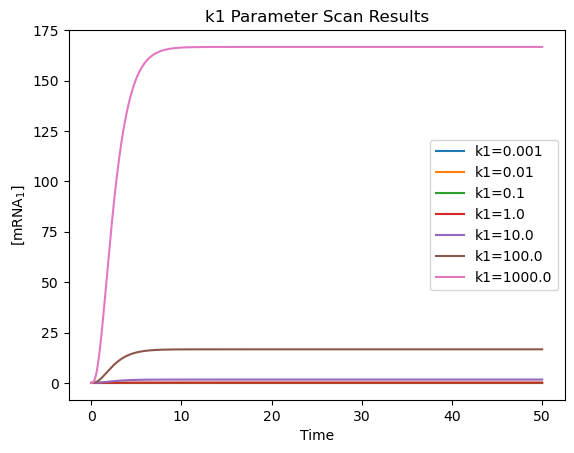

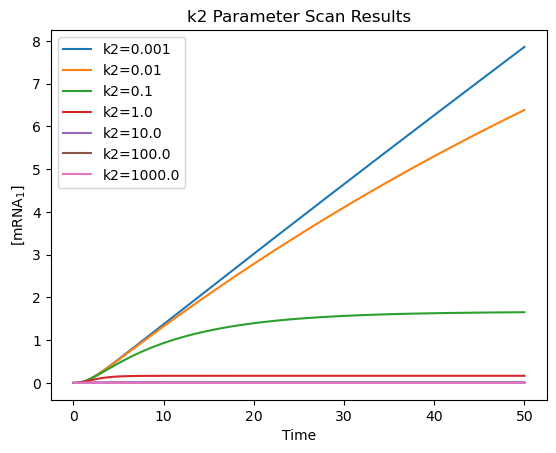

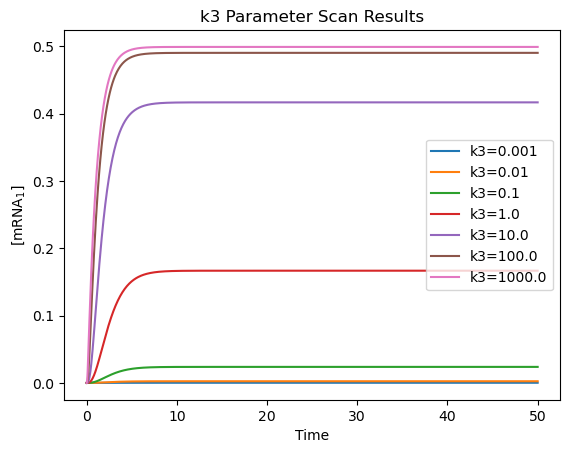

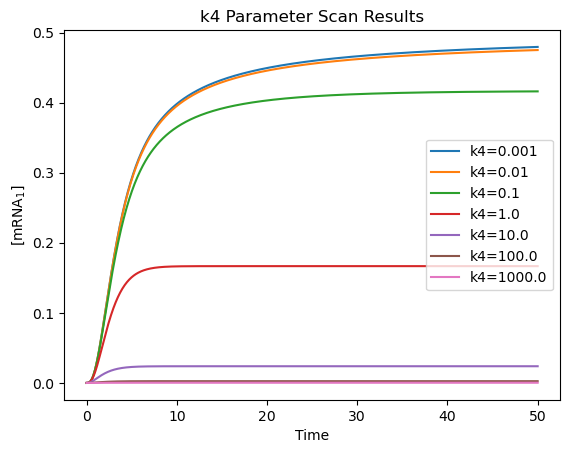

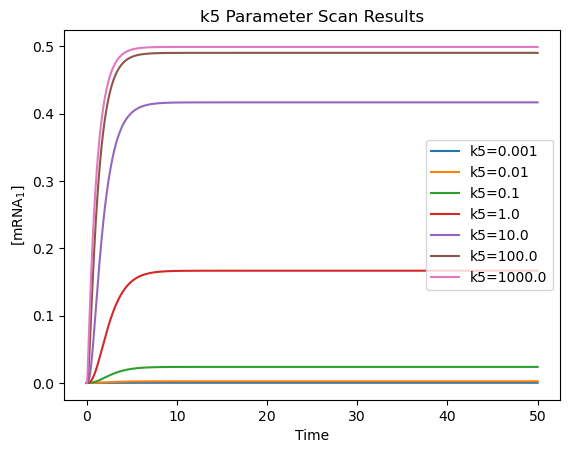

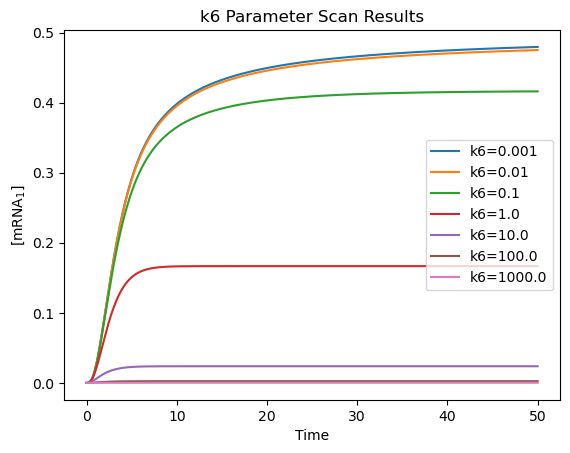

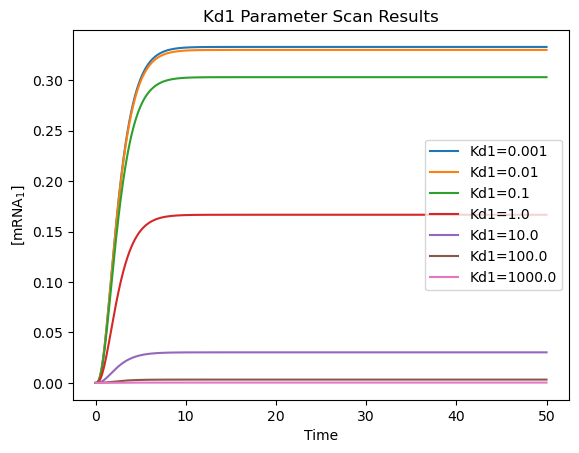

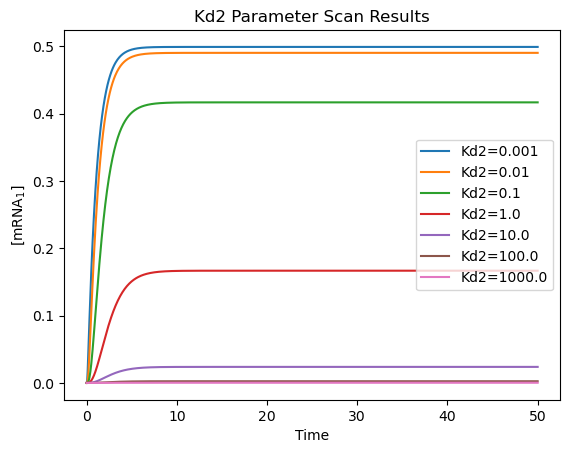

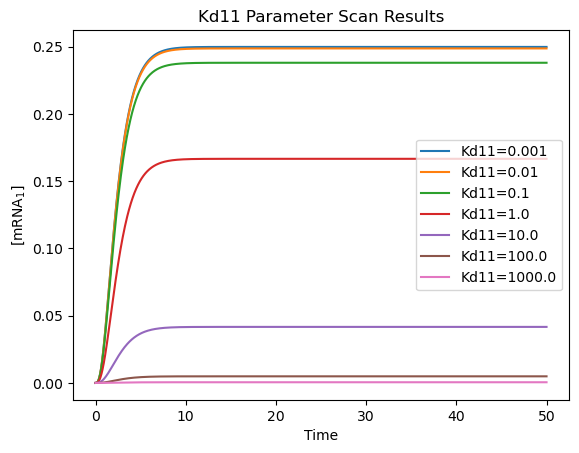

In [119]:
do_param_scans(params, y0, time_steps, 50)